<a href="https://colab.research.google.com/github/tracyhua2/DS3001/blob/main/Final%20Project/DS3001_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/tracyhua2/DS3001/refs/heads/main/Data/NPHA-doctor-visits.csv"
df = pd.read_csv(url)
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [3]:
len(df)

714

In [4]:
# NA Count
df.isna().sum()

,0
Number of Doctors Visited,0
Age,0
Phyiscal Health,0
Mental Health,0
Dental Health,0
Employment,0
Stress Keeps Patient from Sleeping,0
Medication Keeps Patient from Sleeping,0
Pain Keeps Patient from Sleeping,0
Bathroom Needs Keeps Patient from Sleeping,0


In [5]:
df.dtypes

,0
Number of Doctors Visited,int64
Age,int64
Phyiscal Health,int64
Mental Health,int64
Dental Health,int64
Employment,int64
Stress Keeps Patient from Sleeping,int64
Medication Keeps Patient from Sleeping,int64
Pain Keeps Patient from Sleeping,int64
Bathroom Needs Keeps Patient from Sleeping,int64


In [6]:
# response variable is 'Number of Doctors Visited'
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

In [7]:
print(X.head())

   Age  Phyiscal Health  Mental Health  Dental Health  Employment  \
0    2                4              3              3           3   
1    2                4              2              3           3   
2    2                3              2              3           3   
3    2                3              2              3           3   
4    2                3              3              3           3   

   Stress Keeps Patient from Sleeping  Medication Keeps Patient from Sleeping  \
0                                   0                                       0   
1                                   1                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   1                                       0   

   Pain Keeps Patient from Sleeping  \
0                                 0   
1                   

In [8]:
print(y.head())

0    3
1    2
2    3
3    1
4    3
Name: Number of Doctors Visited, dtype: int64


In [9]:
print(df['Number of Doctors Visited'].unique())

[3 2 1]


In [10]:
# why is this not binary variable as stated on the website?
df['Trouble Sleeping'].unique()

array([ 2,  3,  1, -1])

In [11]:
# relabel orginal data
label_df = df.copy()

doctor_map = {1:'0-1',2:'2-3',3:'>=4'}
label_df['Number of Doctors Visited'] = label_df['Number of Doctors Visited'].replace(doctor_map)

age_map = {1:'50-64',2:'65-80'}
label_df['Age'] = label_df['Age'].replace(age_map)

health_map = {-1:'Refused',1:'Excellent',2:'Very Good',3:'Good',4:'Fair',5:'Poor'}
label_df['Phyiscal Health'] = label_df['Phyiscal Health'].replace(health_map)

label_df['Mental Health'] = label_df['Mental Health'].replace(health_map)

label_df['Dental Health'] = label_df['Dental Health'].replace(health_map)

employment_map = {-1:'Refused',1:'Working full-time',2:'Working part-time',
                  3:'Retired',4:'Not working at this time'}
label_df['Employment'] = label_df['Employment'].replace(employment_map)

binary_map = {0:'No',1:'Yes'}
label_df['Stress Keeps Patient from Sleeping'] = label_df['Stress Keeps Patient from Sleeping'].replace(binary_map)
label_df['Medication Keeps Patient from Sleeping'] = label_df['Medication Keeps Patient from Sleeping'].replace(binary_map)
label_df['Pain Keeps Patient from Sleeping'] = label_df['Pain Keeps Patient from Sleeping'].replace(binary_map)
label_df['Bathroom Needs Keeps Patient from Sleeping'] = label_df['Bathroom Needs Keeps Patient from Sleeping'].replace(binary_map)
label_df['Uknown Keeps Patient from Sleeping'] = label_df['Uknown Keeps Patient from Sleeping'].replace(binary_map)
label_df['Uknown Keeps Patient from Sleeping'] = label_df['Uknown Keeps Patient from Sleeping'].replace(binary_map)

# assuming corresponding values for trouble sleeping
trouble_map = {-1:'Refused',1:'Regularly',2:'Occasionally',3:'Never'}
label_df['Trouble Sleeping'] = label_df['Trouble Sleeping'].replace(trouble_map)

med_map = {-1:'Refused',1:'Use regularly',2:'Use occasionally',3:'Do not use'}
label_df['Prescription Sleep Medication'] = label_df['Prescription Sleep Medication'].replace(med_map)

race_map = {-2:'Not asked', -1:'Refused', 1: 'White, Non-Hispanic', 2: 'Black, Non-Hispanic', 3: 'Other, Non-Hispanic', 4: 'Hispanic', 5: '2+ Races, Non-Hispanic'}
label_df['Race'] = label_df['Race'].replace(race_map)

gender_map = {-2:'Not asked',-1:'Refused', 1:'Male', 2:'Female'}
label_df['Gender'] = label_df['Gender'].replace(gender_map)

label_df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,>=4,65-80,Fair,Good,Good,Retired,No,No,No,No,Yes,Occasionally,Do not use,"White, Non-Hispanic",Female
1,2-3,65-80,Fair,Very Good,Good,Retired,Yes,No,No,Yes,No,Never,Do not use,"White, Non-Hispanic",Male
2,>=4,65-80,Good,Very Good,Good,Retired,No,No,No,No,Yes,Never,Do not use,Hispanic,Male
3,0-1,65-80,Good,Very Good,Good,Retired,No,No,No,Yes,No,Never,Do not use,Hispanic,Female
4,>=4,65-80,Good,Good,Good,Retired,Yes,No,No,No,No,Occasionally,Do not use,"White, Non-Hispanic",Female


In [12]:
label_df['Age'].unique()

array(['65-80'], dtype=object)

Text(0.5, 1.0, 'Distribution of Number of Doctors Visited')

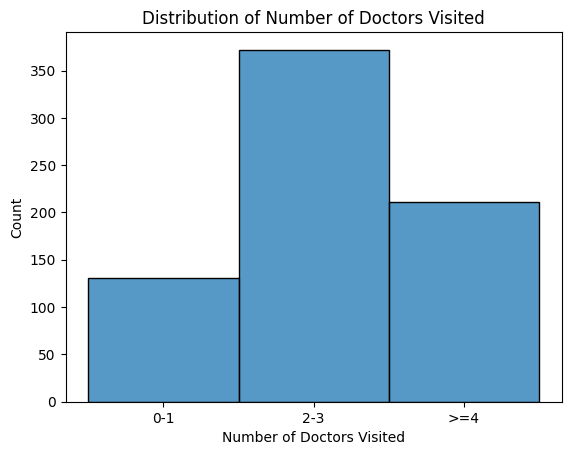

In [13]:
# Distribution of Number of Doctors Visited
label_df['Number of Doctors Visited'] = pd.Categorical(label_df['Number of Doctors Visited'], categories=['0-1','2-3','>=4'], ordered=True)

sns.histplot(label_df['Number of Doctors Visited'], bins=15)
plt.title('Distribution of Number of Doctors Visited')

In [14]:
perc = ((label_df['Number of Doctors Visited'] == '2-3').sum()) / (label_df['Number of Doctors Visited'].count())
print(perc*100)

52.10084033613446


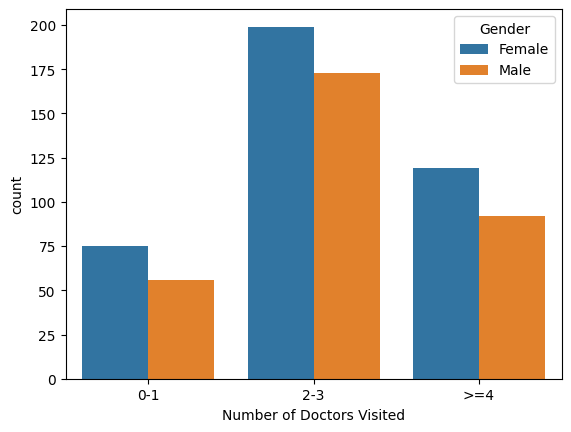

In [15]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Gender')
plt.show()

In [16]:
perc = ((label_df['Gender'] == 'Female').sum()) / (label_df['Gender'].count())
print(perc*100)

55.04201680672269


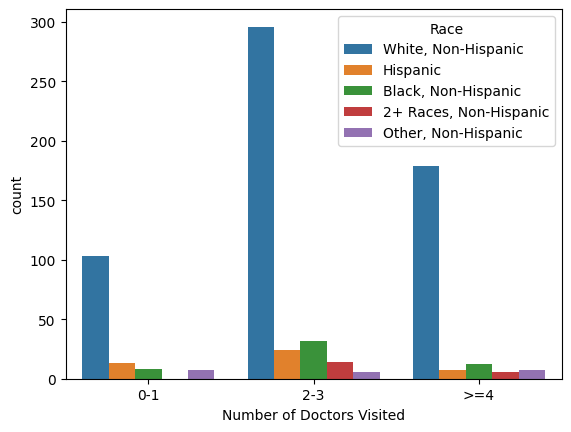

In [17]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Race')
plt.show()

In [18]:
perc = ((label_df['Race'] == 'White, Non-Hispanic').sum()) / (label_df['Race'].count())
print(perc*100)

80.95238095238095


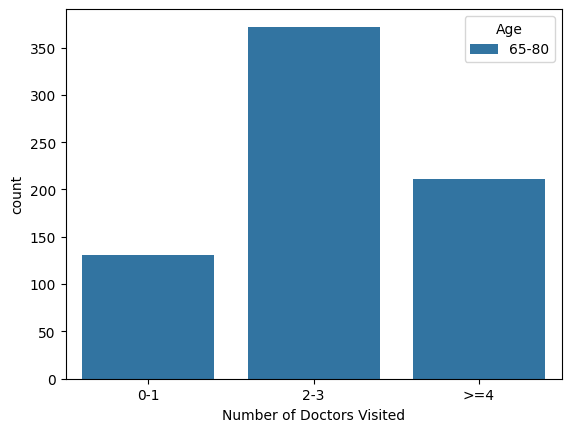

In [19]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Age')
plt.show()

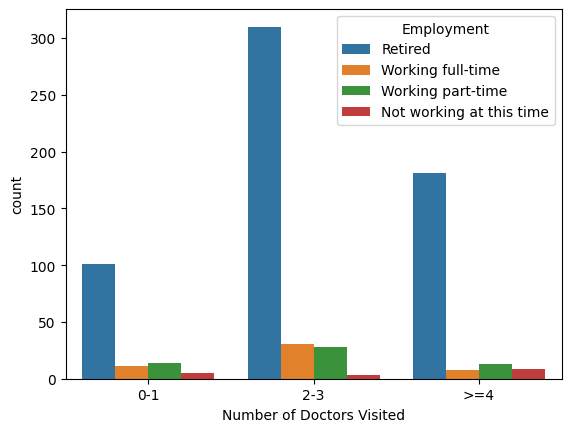

In [20]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Employment')
plt.show()

In [21]:
perc = ((label_df['Employment'] == 'Retired').sum()) / (label_df['Employment'].count())
print(perc*100)

82.91316526610645


In [22]:
# doctors visited grouped by binary variable

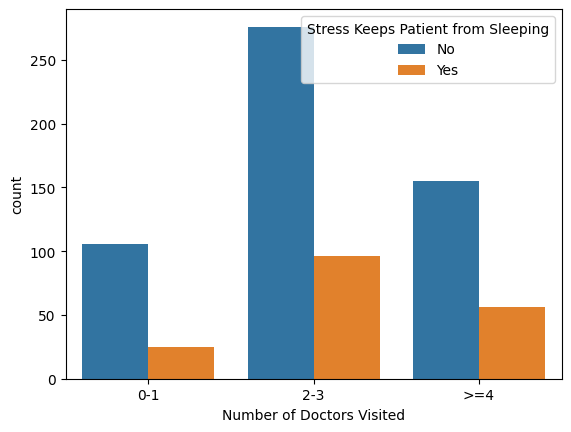

75.21008403361344


In [23]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Stress Keeps Patient from Sleeping')
plt.show()

perc = ((label_df['Stress Keeps Patient from Sleeping'] == 'No').sum()) / (label_df['Stress Keeps Patient from Sleeping'].count())
print(perc*100)

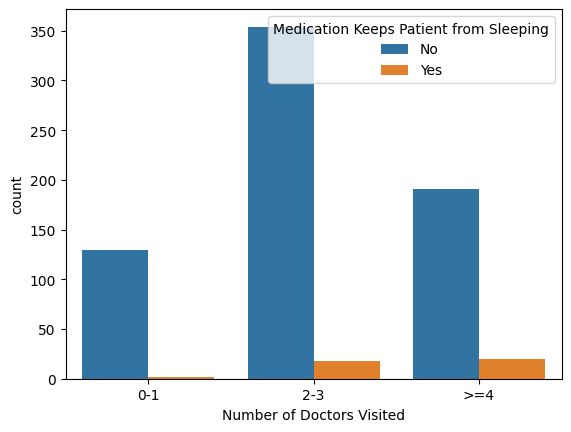

94.39775910364145


In [24]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Medication Keeps Patient from Sleeping')
plt.show()

perc = ((label_df['Medication Keeps Patient from Sleeping'] == 'No').sum()) / (label_df['Medication Keeps Patient from Sleeping'].count())
print(perc*100)

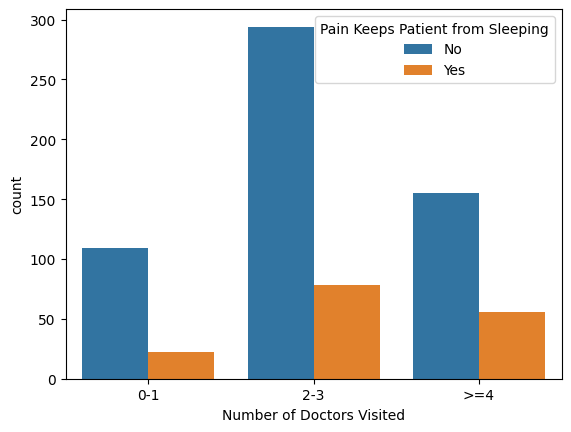

78.15126050420169


In [25]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Pain Keeps Patient from Sleeping')
plt.show()

perc = ((label_df['Pain Keeps Patient from Sleeping'] == 'No').sum()) / (label_df['Pain Keeps Patient from Sleeping'].count())
print(perc*100)

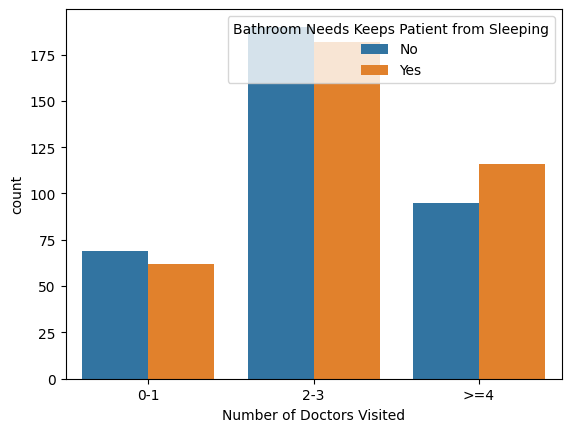

50.42016806722689


In [26]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Bathroom Needs Keeps Patient from Sleeping')
plt.show()

perc = ((label_df['Bathroom Needs Keeps Patient from Sleeping'] == 'Yes').sum()) / (label_df['Bathroom Needs Keeps Patient from Sleeping'].count())
print(perc*100)

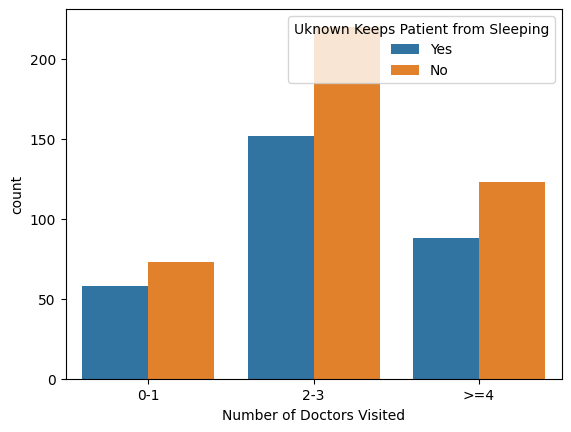

58.26330532212886


In [27]:
sns.countplot(data=label_df, x='Number of Doctors Visited', hue='Uknown Keeps Patient from Sleeping')
plt.show()

perc = ((label_df['Uknown Keeps Patient from Sleeping'] == 'No').sum()) / (label_df['Uknown Keeps Patient from Sleeping'].count())
print(perc*100)

In [28]:
label_df.to_csv('labeled_df.csv', index=False)